# Softmax Regression

Page 208 of Aurelien Geron 

algunos **algoritmos de regresión** pueden usarse para la **clasificación**. 

La regresión logística (también llamada regresión **logit**) se usa comúnmente para estimar la probabilidad de que una instancia pertenezca a una clase en particular 

* (por ejemplo, ¿cuál es la probabilidad de que este correo electrónico sea spam?).

* Si la probabilidad estimada es superior al 50%, el modelo predice que la instancia pertenece a esa clase (denominada clase positiva, etiquetada como "1") y,  
* de lo contrario, predice que no (es decir, pertenece a la clase negativa , etiquetado como "0").   

Esto lo convierte en un **clasificador binario**. 

## Estimación de probabilidades

¿cómo funciona la regresión logística?   

* Al igual que un modelo de regresión lineal, un modelo de *regresión logística* calcula una *suma ponderada de las características de entrada* (más un término de sesgo), 

$$ \text{Sesgo y Suma ponderada de las características de entrada} = \theta_{0} + \sum \theta_{i}x_{i}  $$

* pero en lugar de generar el resultado directamente como lo hace el modelo de regresión lineal,   
  genera *la logística de este resultado* (ver Ecuación 4-13).

Ecuación 4-13. Probabilidad estimada del modelo de regresión logística (forma vectorizada)


$$ \hat{p} = h_{\mathbf{\theta}}(x) = \sigma(\mathbf{x}^{T}\mathbf{\theta}) $$

La logística, señalada como $\sigma(\cdot)$, es una función sigmoide (es decir, en forma de $S$) que genera un número entre 0 y 1.   

Se define como se muestra en la Ecuación 4-14 y la Figura 4-21

$$ \sigma(t) = \frac{1}{1+exp(-t)} $$

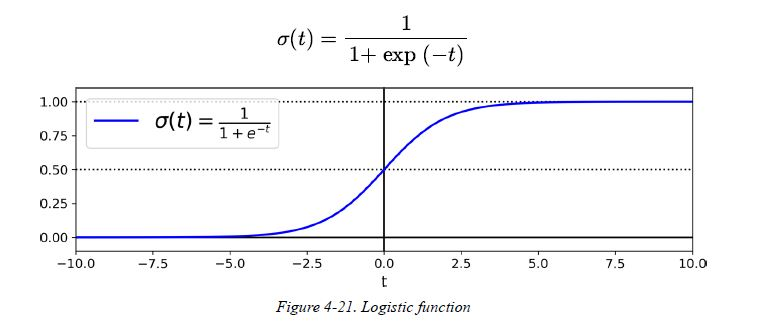

In [1]:
from IPython.display import Image 
Image('figure_4_21.JPG',width=600,height=300)

Una vez que el modelo de regresión logística ha estimado la probabilidad $\hat{p}= h_{\theta}(\mathbf{x}) = \sigma(\mathbf{x}^{T}\mathbf{\theta})$ de que una instancia $\mathbf{x}$ pertenezca a la clase positiva, puede hacer su predicción $\hat{y}$ fácilmente (ver Ecuación 4-15).

Ecuación 4-15. Predicción del modelo de regresión logística

$$ \hat{y} = \begin{cases}0 & \text{si } \hat{p} < 0.5 \\ 1 & \text{si } \hat{p} \geq 0.5 \end{cases} $$

Observe que $\sigma(t) < 0.5$ cuando $t < 0$ y  
* $\sigma(t) \geq 0.5$ cuando $t \geq 0$,   

por lo que el modelo de regresión logística predice:
* 1 si el produto escalar $\mathbf{x}^{T}\mathbf{\theta}$   
  es positivo y  
* $0$ si es negativo.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

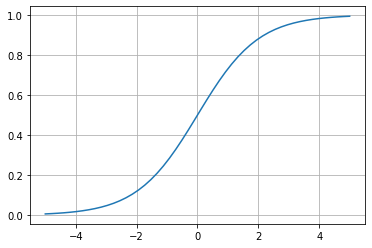

In [3]:
t_sigma=np.linspace(-5,5) 
y_sigma=1/(1+np.exp(-t_sigma)) 
plt.plot(t_sigma,y_sigma) 
plt.grid() 

## NOTE 

La puntuación $t$ a menudo se denomina *logit*.

El nombre proviene del hecho de que la función *logit*, definida como   
$$ logit(p) = \log\left(\frac{p}{1 – p}\right), $$
es la inversa de la función logística.  
Donde $p$ es la probabilidad. 

\begin{align*}
\sigma(t) = \frac{1}{1 + e^{-t}} & \to p = \frac{1}{1+e^{-t}} \\
& \to p(1+e^{-t}) = 1 \\ 
& \to 1+e^{-t} = \frac{1}{p} \\
& \to e^{-t} \frac{1}{p} - 1 \\
& \to e^{-t} \frac{1-p}{p} \\
& \to -t = \ln \left( \frac{1-p}{p} \right) \\
& \to t = \ln \left( \frac{p}{1-p} \right) 
\end{align*}

De hecho, si calcula el logit de la probabilidad estimada $p$, encontrará que el resultado es $t$.

El logit también se denomina log-odds, ya que es el logaritmo de la relación entre la probabilidad estimada para la clase positiva y la probabilidad estimada para la clase negativa.

$$ log-odds = \ln \left( \frac{\text{probabilidad de la clase positiva }}{\text{probabilidad de la clase negativa}} \right)  $$

## Función de entrenamiento y coste

Ahora sabe cómo un modelo de regresión logística estima probabilidades y hace predicciones.

Pero, ¿cómo se entrena?   

El objetivo del entrenamiento es establecer el vector de parámetros $\mathbf{\theta}$ de modo que el modelo estime altas probabilidades para instancias positivas $(y = 1)$ y bajas probabilidades para instancias negativas $(y = 0)$.

Esta idea es capturada por la función de costo que se muestra en la Ecuación 4-16 para una sola instancia de entrenamiento $\mathbf{x}$.

Ecuación 4-16. Función de coste de una única instancia de formación

$$ c(\mathbf{\theta}) = \begin{cases} -\log(\hat{p}) & \text{Si } y = 1 \\ -\log(1-\hat{p}) & \text{Si } y = 0 \end{cases} $$

* Esta función de costo tiene sentido porque $–log(t)$ crece mucho cuando $t$ se acerca a $0$, por lo que  
*  el costo será alto si el modelo estima una probabilidad cercana a 0 para una instancia positiva,   
   y también  
* será muy grande si el modelo estima una probabilidad cercana a 1 para una instancia negativa.

Por otro lado,   
* $–log(t)$ está cerca de $0$ cuando $t$ está cerca de $1$, por lo que   
* el costo será cercano a $0$ si la probabilidad estimada es cercana a $1$ para una instancia   
  positiva o   
* cercana a 0 para una instancia $X$ negativa, que es precisamente lo que queremos.

## La función de coste de todo el conjunto de entrenamiento

La función de coste de todo el conjunto de entrenamiento es el coste medio de todas las instancias de entrenamiento.

Se puede escribir en una sola expresión llamada *pérdida logarítmica*, que se muestra en la ecuación 4-17.

Ecuación 4-17. Función de costo de regresión logística (pérdida logarítmica)

$$ J(\mathbf{\theta}) =  -\frac{1}{m}\sum_{i = 1}^{m} \left[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)}) \log\left(1-\hat{p}^{(i)}\right) \right] $$

La mala noticia es que no existe una ecuación de forma cerrada conocida para calcular el valor de $\theta$ que minimice esta función de costo (no existe un equivalente de la Ecuación Normal).

La buena noticia es que esta función de costo es convexa, por lo que se garantiza que Gradient Descent (o cualquier otro algoritmo de optimización) encuentre el mínimo global (si la tasa de aprendizaje no es demasiado grande y espera lo suficiente).

Las derivadas parciales de la función de costo con respecto al $j$ - ésimo parámetro del modelo  $\theta_{j}$ vienen dadas por la Ecuación 4-18.

Ecuación 4-18. Derivadas parciales de la función de costo logístico

$$ \frac{\partial}{\partial \theta_{j}} J(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma\left( \mathbf{\theta}^{T}\mathbf{x}^{(i)} \right) - y^{(i)} \right)x_{j}^{(i)} $$

Esta ecuación se parece mucho a la Ecuación 4-5: para cada instancia, calcula el error de predicción y lo multiplica por el valor de la $j$ ésima característica, y luego calcula el promedio de todas las instancias de entrenamiento.

Una vez que tenga el vector de gradiente que contiene todas las derivadas parciales, puede usarlo en el algoritmo Batch Gradient Descent.

* ahora sabe cómo entrenar un modelo de regresión logística.   
* Para Stochastic GD, tomaría una instancia a la vez,   
* y para Minibatch GD, usaría un mini-lote a la vez.

## Límites de decisión

Usemos el conjunto de datos de *flores iris* para ilustrar la regresión logística.

Este es un famoso conjunto de datos que contiene el largo y ancho del sépalo y pétalo de 150 flores de iris de tres especies diferentes: 
* *Iris setosa*,   
* *Iris versicolor* e   
* *Iris virginica*   
(ver Figura 4-22).

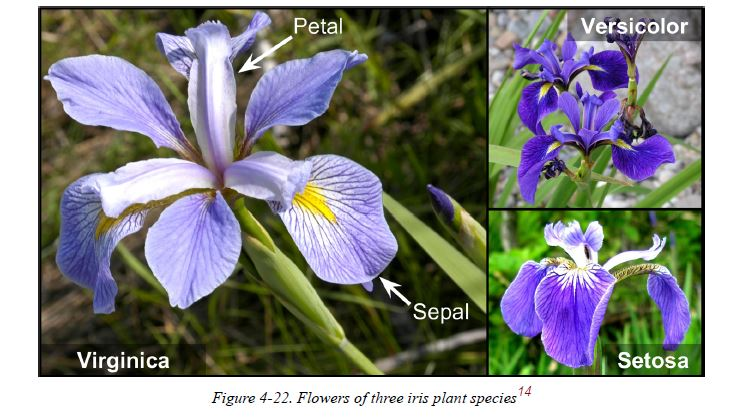

In [20]:
from IPython.display import Image 
Image('figure_4_22.JPG',width=800,height=400)  

Figura 4-22. Flores de tres especies de plantas de iris   

Intentemos construir un clasificador para detectar el tipo de *Iris virginica* ($y = 2$) basado solo en la característica del ancho del pétalo $X[3]$.   

Primero carguemos los datos:

In [3]:
import numpy as np 
from sklearn import datasets
iris = datasets.load_iris()
iris.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris['target_names']        

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Nuestra función objetivo $y$ representará a la clase positiva de *las virgínicas*. 

In [6]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

Ahora entrenemos un modelo de regresión logística:

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Veamos las probabilidades estimadas del modelo para flores con pétalos de ancho
variando de 0 cm a 3 cm (Figura 4-23):

In [8]:
import matplotlib.pyplot as plt 

In [9]:
x=np.array([1,2,3]).reshape(3,1) 

In [10]:
x 

array([[1],
       [2],
       [3]])

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1) 

In [12]:
y_proba = log_reg.predict_proba(X_new)
y_proba   # esta es una matriz de dos columnas 
          # cada una de estas columnas son probabilidades de eventos complementarios 

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [13]:
y_proba[0,0]+y_proba[0,1] 

1.0

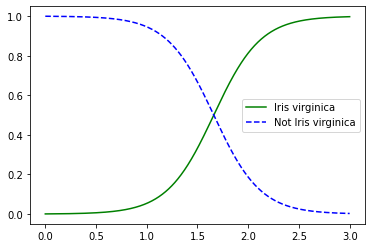

In [15]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend() 
# + more Matplotlib code to make the image look pretty

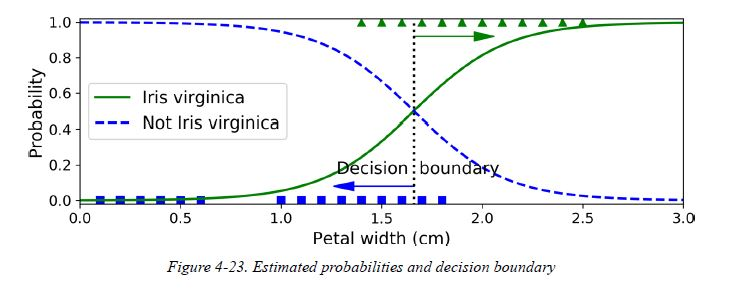

In [16]:
from IPython.display import Image 
Image('figure_4_23.JPG',width=600,height=300) 

El ancho de los pétalos de las flores de Iris virginica (representadas por triángulos) varía de 1,4 cm a 2,5 cm, mientras que las otras flores de iris (representadas por cuadrados) generalmente tienen un ancho de pétalos más pequeño, que van de 0,1 cm a 1,8 cm.  

Observe que hay un poco de superposición.

Por encima de aproximadamente 2 cm, el clasificador está muy seguro de que la flor es una Iris virginica (produce una alta probabilidad para esa clase), mientras que por debajo de 1 cm está muy seguro de que no es una Iris virginica (alta probabilidad para el tipo "No Iris virginica ”clase).

Entre estos extremos, el clasificador no está seguro.

Sin embargo, si le pide que prediga la clase (utilizando el método ``predict()`` en lugar del método `` predict_proba()``), devolverá la clase que sea más probable.

Por lo tanto, hay un límite de decisión de alrededor de 1,6 cm donde ambas probabilidades son iguales al 50%: si el ancho del pétalo es superior a 1,6 cm, el clasificador predecirá que la flor es una Iris virginica y, de lo contrario, predecirá que es no (incluso si no tiene mucha confianza):

In [18]:
log_reg.predict([[1.5], [1.7]]) 

array([0, 1])

In [19]:
log_reg.predict([[1.7]])    

array([1])

La Figura 4-24 muestra el mismo conjunto de datos, pero esta vez con dos características: ancho y largo del pétalo.

Una vez entrenado, el clasificador de Regresión Logística puede, basándose en estas dos características, estimar la probabilidad de que una nueva flor sea una Iris virginica.

La línea discontinua representa los puntos donde el modelo estima una probabilidad del 50%: este es el límite de decisión del modelo.

Tenga en cuenta que es un límite lineal.   

Cada línea paralela representa los puntos donde el modelo genera un probabilidad específica, del 15% (abajo a la izquierda) al 90% (arriba a la derecha).

Todas las flores más allá de la línea superior derecha tienen más del 90% de probabilidad de ser Iris virginica,
según el modelo.

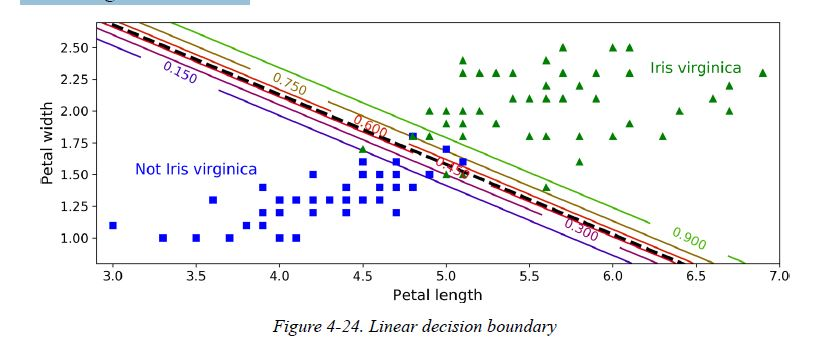

In [1]:
from IPython.display import Image 
Image('figure_4_24.JPG',width=600,height=300) 

Al igual que los otros modelos lineales, los modelos de regresión logística se pueden regularizar mediante penalizaciones $\mathcal{l}_{1}$ o $\mathcal{l}_{2}$.

``Scikit-Learn`` en realidad agrega una penalización $\mathcal{l}_{2}$ por defecto.

NOTA

El hiperparámetro que controla la fuerza de regularización de un modelo de Scikit-Learn ``LogisticRegression`` no es alfa (como en otros modelos lineales), sino su inverso: $C$.

Cuanto mayor sea el valor de $C$, menos regularizará el modelo.

## Regresión Softmax

El modelo de regresión logística se puede generalizar para admitir múltiples clases directamente, sin tener que entrenar y combinar múltiples clasificadores binarios (como se discutió en el Capítulo 3).

Esto se llama *Regresión Softmax* o *Regresión logística multinomial*.

La idea es simple: cuando se le da una instancia $\mathbf{x}$, el modelo de Regresión Softmax primero calcula una puntuación $s_{k}(\mathbf{x})$ para cada clase $k$, luego estima la probabilidad de cada clase aplicando la función softmax (también llamada exponencial normalizada) a las puntuaciones.

La ecuación para calcular $s_{k}(x)$ debería parecer familiar, ya que es como la ecuación para la predicción de regresión lineal (consulte la ecuación 4-19).

Ecuación 4-19. Puntaje softmax para la clase $k$

$$ s_{k}(\mathbf{x}) =  \mathbf{x}^{T}\mathbf{\theta}^{(k)} $$

Tenga en cuenta que cada clase tiene su propio vector de parámetro dedicado $\mathbf{\theta}^{(k)}$.

Todos estos vectores se almacenan normalmente como filas en una *matriz de parámetros* $\Theta$.

Una vez que haya calculado la puntuación de cada clase para la instancia $x$, puede estimar la probabilidad $\hat{p}$ de que la instancia pertenezca a la clase $k$ ejecutando las puntuaciones a través de la función softmax (Ecuación 4-20).

La función calcula el exponencial de cada puntaje y luego los normaliza (dividiendo por la suma de todos los exponenciales).

Los puntajes generalmente se denominan logits o log-odds (aunque en realidad son log-odds no normalizados).
Ecuación 4-20. Función Softmax

$$ \hat{p}_{k} = \sigma(s(x))_{k} = \frac{exp(s_{k}(x))}{\sum_{j=1}^{k} exp(s_{j}(x)) } $$

En esta ecuación:

* $K$ is the number of classes.  
* $s(x)$ is a vector containing the scores of each class for the instance $x$.  
* $\sigma(s(x))$ is the estimated probability that the instance $x$ belongs to class $k$, given the   
  scores of each class for that instance.

* $K$ es el número de clases.  
* $s(x)$ es un vector que contiene las puntuaciones de cada clase para la instancia $x$.
* $\sigma(s(x))$ es la probabilidad estimada de que la instancia $x$ pertenezca a la clase $k$, dadas  
  las puntuaciones de cada clase para ese caso.

Al igual que el clasificador de regresión logística, el clasificador de regresión Softmax predice la clase con la probabilidad estimada más alta (que es simplemente la clase con la puntuación más alta), como se muestra en la ecuación 4-21.

Equation 4-21. Softmax Regression classifier prediction

    $$ \hat{y} = argmax_{k} \sigma(s(x))_{k} = argmax_{k} s_{k}(x) = argmax_{k} \left( \left( \theta^{k} \right)^{T}x \right)  $$

El operador $argmax$ devuelve el valor de una variable que maximiza una función.

En esta ecuación, devuelve el valor de k que maximiza la probabilidad estimada $\sigma(s(x))$.

## TIP

El clasificador Softmax Regression predice solo una clase a la vez (es decir, es multiclase, no
multioutput), por lo que debe usarse solo con clases mutuamente excluyentes, como diferentes tipos de plantas.  

No puede usarlo para reconocer a varias personas en una imagen.

Ahora que sabe cómo el modelo estima las probabilidades y hace predicciones, echemos un vistazo al entrenamiento. El objetivo es tener un modelo que calcule una probabilidad alta para la clase objetivo (y, en consecuencia, una probabilidad baja para las otras clases).

Minimizar la función de costo que se muestra en la Ecuación 4-22, llamada entropía cruzada, debería conducir a este objetivo porque penaliza al modelo cuando estima una probabilidad baja para una clase objetivo.   

Cruzar la entropía se usa con frecuencia para medir qué tan bien un conjunto de probabilidades de clase estimadas coincide con las clases objetivo.

Ecuación 4-22. Función de costo de entropía cruzada

$$ J(\Theta) = − \frac{1}{m} \sum_{i = 1}^{m} \sum_{k=1}^{K} y_{k}^{(i)}\log\left(\hat{p}_{k}^{(i)} \right) $$ 

En esta ecuación: $y_{k}^{(i)}$ es la probabilidad objetivo de que la instancia de $i$ pertenezca a la clase $k$.

En general, es igual a $1$ o $0$, dependiendo de si la instancia pertenece a la clase o no.

Observe que cuando solo hay dos clases $(K = 2)$, esta función de costo es equivalente a la función de costo de la regresión logística (pérdida logarítmica; consulte la ecuación 4-17).

## ENTROPÍA CRUZADA

La entropía cruzada se originó en la teoría de la información.   

Suponga que quiere transmitir de manera eficiente información sobre el clima todos los días.

Si hay ocho opciones (soleado, lluvioso, etc.), puede codificar cada opción usando tres bits porque $2^{3} = 8$.

Sin embargo, si cree que estará soleado casi todos los días, sería mucho más eficiente codificar "soleado" en solo un bit (0) y las otras siete opciones en cuatro bits (comenzando con un 1).

La entropía cruzada mide la cantidad promedio de bits que realmente envía por opción.

Si su suposición sobre el clima es perfecta, la entropía cruzada será igual a la entropía del
el clima en sí mismo (es decir, su intrínseca imprevisibilidad).

Pero si sus suposiciones son incorrectas (por ejemplo, si llueve con frecuencia), la entropía cruzada será mayor en una cantidad
denominada divergencia Kullback-Leibler (KL).

La entropía cruzada entre dos distribuciones de probabilidad $p$ y $q$ se define como

$$ H(p, q) = −\sum_{x} p(x) \log q(x) $$

(al menos cuando las distribuciones son discretas).

Para más detalles, mira mi video sobre el tema.

El vector gradiente de esta función de costo con respecto a $\theta^{k}$ viene dado por la Ecuación 4-23.

Ecuación 4-23. Vector de gradiente de entropía cruzada para clase k

$$ \nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{p}_{k}^{(i)} -y_{k}^{(i)}  \right)\mathbf{x}^{(i)}  $$

Ahora puede calcular el vector de gradiente para cada clase, luego usar Gradient Descent (o cualquier otro algoritmo de optimización) para encontrar la matriz de parámetros $\Theta$ que minimiza la función de costo.

Usemos Softmax Regression para clasificar las flores de iris en las tres clases.

LogisticRegression de Scikit-Learn usa uno contra el resto de forma predeterminada cuando lo entrena en más de dos clases, pero puede establecer el hiperparámetro multi_class en "multinomial" para cambiarlo a Softmax Regression.

También debe especificar un solucionador que admita Regresión Softmax, como el solucionador "``lbfgs``" (consulte la documentación de Scikit-Learn para obtener más detalles).

También aplica la regularización $\mathcal{l}_{2}$ de forma predeterminada, que puede controlar mediante el hiperparámetro $C$:

In [ ]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

Entonces, la próxima vez que encuentre un iris con pétalos de 5 cm de largo y 2 cm de ancho, puede pedirle a su modelo que le diga qué tipo de iris es, y responderá Iris virginica (clase 2) con 94.2% de probabilidad ( o Iris versicolor con un 5,8% de probabilidad):

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

La Figura 4-25 muestra los límites de decisión resultantes, representados por los colores de fondo. Observe que los límites de decisión entre dos clases son lineales.

La figura también muestra las probabilidades para la clase Iris versicolor, representadas por las líneas curvas (por ejemplo, la línea etiquetada con 0.450 representa el límite de probabilidad del 45%).

Observe que el modelo puede predecir una clase que tiene una probabilidad estimada por debajo del 50%. Por ejemplo, en el punto donde todos los límites de decisión se encuentran, todas las clases tienen una probabilidad estimada igual del 33%.

In [ ]:
from IPython.display import Image
Image('figure_4_25.jpg',width=600,height=300) 

## Exercises

1. ¿Qué algoritmo de entrenamiento de regresión lineal puede usar si tiene un conjunto de entrenamiento con millones de características?

2. Suponga que las características de su conjunto de entrenamiento tienen escalas muy diferentes.
   ¿Qué algoritmos podrían sufrir esto y cómo? ¿Qué puedes hacer al respecto?

3. ¿Puede el Gradient Descent quedarse atascado en un mínimo local al entrenar
¿Modelo de regresión logística?

4. ¿Todos los algoritmos de Gradient Descent conducen al mismo modelo, siempre que
los dejas correr el tiempo suficiente?

5. Suponga que usa Batch Gradient Descent y traza la validación
error en cada época. Si nota que el error de validación consiste
sube, ¿qué es probable que esté pasando? ¿Cómo puede arreglarlo?

6. ¿Es una buena idea detener el descenso de gradiente por lotes pequeños inmediatamente cuando
el error de validación sube?

7. ¿Qué algoritmo de Gradient Descent (entre los que discutimos) llega más rápido a las proximidades   
   de la solución óptima?   
¿Que lo hará realmente converger?   
¿Cómo puedes hacer que los demás también converjan?

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that   
   there is a large gap between the training error and the validation error. What is happening?  
   What are three ways to solve this?

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high.  
Would you say that the model suffers from high bias or high variance?  
Should you increase the regularization hyperparameter α or reduce it?

10. Why would you want to use:  
    a. Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?  
    b. Lasso instead of Ridge Regression?  
    c. Elastic Net instead of Lasso?

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you   
    implement two Logistic Regression classifiers or one Softmax Regression classifier?

12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).  

Solutions to these exercises are available in Appendix A.

1. It is often the case that a learning algorithm will try to optimize a different function than   
   the performance measure used to evaluate the final model. This is generally because that function   
   is easier to compute, because it has useful differentiation properties that the performance   
   measure lacks, or because we want to constrain the model during training, as you will see when we   
   discuss regularization.

2 Note that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_).

3 Technically speaking, its derivative is Lipschitz continuous.

4 Since feature 1 is smaller, it takes a larger change in θ to affect the cost function, which is why the
bowl is elongated along the θ axis.

5. Eta ($\eta$) is the seventh letter of the Greek alphabet.

6 While the Normal Equation can only perform Linear Regression, the Gradient Descent algorithms
can be used to train many other models, as we will see.

7 Una ecuación cuadrática tiene la forma $y = ax^{2} + bx + c$.

8 This notion of bias is not to be confused with the bias term of linear models.

9 It is common to use the notation J(θ) for cost functions that don’t have a short name; we will often
use this notation throughout the rest of this book. The context will make it clear which cost function
is being discussed.

10 Norms are discussed in Chapter 2.

11 A square matrix full of 0s except for 1s on the main diagonal (top left to bottom right).

12 Alternatively you can use the Ridge class with the "sag" solver. Stochastic Average GD is a variant
of Stochastic GD. For more details, see the presentation “Minimizing Finite Sums with the Stochastic
Average Gradient Algorithm” by Mark Schmidt et al. from the University of British Columbia.

13 You can think of a subgradient vector at a nondifferentiable point as an intermediate vector between
the gradient vectors around that point.

14. Photos reproduced from the corresponding Wikipedia pages. Iris virginica photo by Frank Mayfield  
    (Creative Commons BY-SA 2.0), Iris versicolor photo by D. Gordon E. Robertson (Creative  Commons  
    BY-SA 3.0), Iris setosa photo public domain.

15. La función reshape () de NumPy permite que una dimensión sea –1, que significa "sin especificar":
   El valor se infiere de la longitud de la matriz y las dimensiones restantes.

16. Es el conjunto de puntos x tales que $\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} = 0$, lo que define una línea recta.